In [1]:
import pandas as pd

train =pd.read_csv('/content/train_data2.csv')
train.head()

,Unnamed: 0,Sentence,Target
0,659,Appellant had stated to the officers that she ...,Invalid
1,3456,We shall discuss the facts more fully in conne...,Others
2,2043,"â€œPerjury is a false statement, either writte...",Invalid
3,3344,The offense is felony theft by false pretext; ...,Issue
4,3231,Numerous contentions urging the commission of ...,Issue


In [2]:
train['Target']=train['Target'].replace(['Rule/Law/holding'],'Rule/Law/Holding')
train['Target']=train['Target'].replace(['Others'],'Invalid')
train['Target'].unique()

array(['Invalid', 'Issue', 'Analysis', 'Facts', 'Conclusion',
       'Rule/Law/Holding'], dtype=object)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Class=3, n=549 (15.794%)
Class=4, n=218 (6.272%)
Class=0, n=520 (14.960%)
Class=2, n=1770 (50.921%)
Class=1, n=179 (5.150%)
Class=5, n=240 (6.904%)


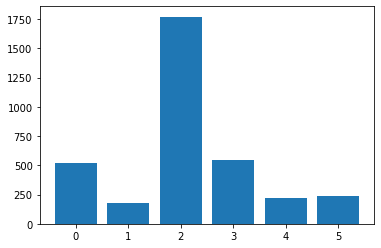

In [3]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [4]:
#cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train['Sentence'])
print(X_tfidf.shape)

(3476, 6448)


In [6]:
from sklearn.externals import joblib
joblib.dump(tfidf_vect, '/content/tf_idf.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/content/tf_idf.pkl']

In [7]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,015,1,10,100,1000,10000,100000,10000000,1000x22,1006,1008,1008a,101,1013,1015,102,1026,104,1044,105,10511,1065,107,107c,1081,1084,1097,10a,10acre,11,110,1102,111,1116,112,113,1130,113637,1140,...,œtell,œtesting,œtestâ,œthat,œthatâ,œthe,œthere,œthey,œthick,œthis,œto,œtommy,œtwo,œtwoâ,œunlawfully,œunlawfullyâ,œunless,œupon,œvagrancyâ,œvalue,œvery,œvisited,œwaived,œwalked,œwas,œwater,œwe,œwell,œwhat,œwhen,œwhere,œwhile,œwhisky,œwhoever,œwhy,œwilfullyâ,œwillfullyâ,œyesâ,œyou,œyour
0,0.13469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=Invalid, n=1770 (16.667%)
Class=Issue, n=1770 (16.667%)
Class=Analysis, n=1770 (16.667%)
Class=Facts, n=1770 (16.667%)
Class=Conclusion, n=1770 (16.667%)
Class=Rule/Law/Holding, n=1770 (16.667%)


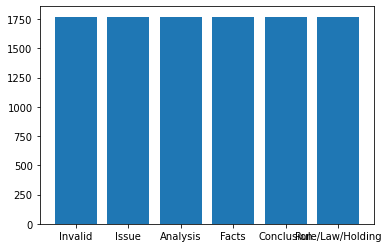

In [8]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=777,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [9]:
#using smote and stochastic gradient boosting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

Accuracy 0.9187587168758717
                  precision    recall  f1-score   support

        Analysis       0.87      0.95      0.91       475
      Conclusion       0.95      0.99      0.97       467
           Facts       0.93      0.70      0.80       467
         Invalid       0.85      0.89      0.87       476
           Issue       0.97      0.99      0.98       479
Rule/Law/Holding       0.95      0.98      0.97       504

        accuracy                           0.92      2868
       macro avg       0.92      0.92      0.92      2868
    weighted avg       0.92      0.92      0.92      2868



In [10]:
unlabel = pd.read_csv(r'/content/Unlabeled_data.csv')
unlabel.head()

,Unnamed: 0,text,Complete
0,0,No motion for rehearing filed.,1
1,1,— Relator is under accusation of killing her h...,1
2,2,From an order of the District Judge of the 39t...,1
3,3,Relator and her husband had been married for a...,1
4,4,The evidence indicates that their family relat...,1


In [11]:
del unlabel['Complete']

In [12]:
del unlabel['Unnamed: 0']

In [13]:
unlabel.head()

,text
0,No motion for rehearing filed.
1,— Relator is under accusation of killing her h...
2,From an order of the District Judge of the 39t...
3,Relator and her husband had been married for a...
4,The evidence indicates that their family relat...


In [14]:
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
unlabel['text'] = unlabel['text'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x for x in x.split() if x not in words))


In [15]:
from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')
nltk.download('punkt')
unlabel['text'] = unlabel['text'].apply(lambda x: TextBlob(x).words)
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
unlabel.head()

,text
0,motion rehearing filed
1,relator accusation killing husband virgil clark
2,order district judge 39th judicial district re...
3,relator husband married number year
4,evidence indicates family relation always plea...


In [17]:
len(unlabel)

537703

In [18]:
unlabel_1 = unlabel.loc[:100000]
print("length of unlabel_1",len(unlabel_1))
unlabel_2 = unlabel.loc[100001:200000]
print("length of unlabel_2",len(unlabel_2))
unlabel_3 = unlabel.loc[200001:300000]
print("length of unlabel_3",len(unlabel_3))
unlabel_4 = unlabel.loc[300001:400000]
print("length of unlabel_4",len(unlabel_4))
unlabel_5 = unlabel.loc[400001:]
print("length of unlabel_5",len(unlabel_5))

length of unlabel_1 100001
length of unlabel_2 100000
length of unlabel_3 100000
length of unlabel_4 100000
length of unlabel_5 137702


In [19]:
x_un1 = tfidf_vect.transform(unlabel_1['text'])


In [20]:
x_un1.shape

(100001, 6448)

In [21]:
pred_unlabel_1 = sgd.predict(x_un1)

In [22]:
unlabel_1['Target']=pred_unlabel_1
unlabel_1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Target
0,motion rehearing filed,Invalid
1,relator accusation killing husband virgil clark,Facts
2,order district judge 39th judicial district re...,Facts
3,relator husband married number year,Facts
4,evidence indicates family relation always plea...,Facts


In [23]:
train = train.rename(columns={'Sentence':'text'})
train.head()

,Unnamed: 0,text,Target
0,659,Appellant had stated to the officers that she ...,Invalid
1,3456,We shall discuss the facts more fully in conne...,Invalid
2,2043,"â€œPerjury is a false statement, either writte...",Invalid
3,3344,The offense is felony theft by false pretext; ...,Issue
4,3231,Numerous contentions urging the commission of ...,Issue


In [24]:
frame_1 = [train,unlabel_1]
train_1 = pd.concat(frame_1)
len(train_1)

103477

In [25]:
x_train_1 = tfidf_vect.transform(train_1['text'])
x_train_1.shape

(103477, 6448)

In [26]:
X, y = oversample.fit_resample(x_train_1, train_1['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.8924926496621154
                  precision    recall  f1-score   support

        Analysis       0.88      0.87      0.87     10856
      Conclusion       0.96      0.93      0.94     10889
           Facts       0.91      0.81      0.86     10727
         Invalid       0.89      0.86      0.87     10899
           Issue       0.87      0.94      0.90     10825
Rule/Law/Holding       0.85      0.96      0.90     10767

        accuracy                           0.89     64963
       macro avg       0.89      0.89      0.89     64963
    weighted avg       0.89      0.89      0.89     64963



In [27]:
x_un2 = tfidf_vect.transform(unlabel_2['text'])
x_un2.shape

(100000, 6448)

In [28]:
pred_unlabel_2 = sgd.predict(x_un2)

In [29]:
unlabel_2['Target']=pred_unlabel_2
unlabel_2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Target
100001,responding conclusion regarding evidence annou...,Conclusion
100002,conviction transporting intoxicating liquor pu...,Rule/Law/Holding
100003,bill exception case filed late,Facts
100004,motion new trial overruled october 22 1927 ord...,Facts
100005,thereafter december 10th extension order made ...,Analysis


In [30]:
frame_2 = [train_1,unlabel_2]
train_2 = pd.concat(frame_2)
len(train_2)

203477

In [31]:
x_train_2 = tfidf_vect.transform(train_2['text'])
x_train_2.shape

(203477, 6448)

In [32]:
X, y = oversample.fit_resample(x_train_2, train_2['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9025193158834531
                  precision    recall  f1-score   support

        Analysis       0.90      0.87      0.88     19918
      Conclusion       0.96      0.93      0.95     19772
           Facts       0.92      0.83      0.88     19513
         Invalid       0.90      0.87      0.89     19567
           Issue       0.88      0.94      0.91     19770
Rule/Law/Holding       0.86      0.96      0.91     19627

        accuracy                           0.90    118167
       macro avg       0.90      0.90      0.90    118167
    weighted avg       0.90      0.90      0.90    118167



In [33]:
x_un3 = tfidf_vect.transform(unlabel_3['text'])
x_un3.shape

(100000, 6448)

In [34]:
pred_unlabel_3 = sgd.predict(x_un3)

In [35]:
unlabel_3['Target']=pred_unlabel_3
unlabel_3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Target
200001,another man carrying clothes,Facts
200002,officer testified appellant several item cloth...,Invalid
200003,investigation followed report breaking entry a...,Facts
200004,appellant present,Issue
200005,warrant arrest issued officer went hotel waite...,Facts


In [36]:
frame_3 = [train_2,unlabel_3]
train_3 = pd.concat(frame_3)
len(train_3)

303477

In [37]:
x_train_3 = tfidf_vect.transform(train_3['text'])
x_train_3.shape

(303477, 6448)

In [38]:
X, y = oversample.fit_resample(x_train_3, train_3['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9100491460211879
                  precision    recall  f1-score   support

        Analysis       0.90      0.89      0.89     28173
      Conclusion       0.96      0.94      0.95     28405
           Facts       0.94      0.84      0.89     27667
         Invalid       0.92      0.88      0.90     28365
           Issue       0.89      0.94      0.92     27943
Rule/Law/Holding       0.87      0.96      0.91     28128

        accuracy                           0.91    168681
       macro avg       0.91      0.91      0.91    168681
    weighted avg       0.91      0.91      0.91    168681



In [39]:
x_un4 = tfidf_vect.transform(unlabel_4['text'])
x_un4.shape


(100000, 6448)

In [40]:
pred_unlabel_4 = sgd.predict(x_un4)
unlabel_4['Target']=pred_unlabel_4
unlabel_4.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,Target
300001,statute final judgment appeal court lie senten...,Rule/Law/Holding
300002,sentence must pronounced term court judgment r...,Rule/Law/Holding
300003,court sentence defendant vacation,Invalid
300004,court adjourned authority case ceased notice a...,Analysis
300005,pronouncing sentence authorized vacation autho...,Rule/Law/Holding


In [41]:
frame_4 = [train_3,unlabel_4]
train_4 = pd.concat(frame_4)
len(train_4)

403477

In [42]:
x_train_4 = tfidf_vect.transform(train_4['text'])
x_train_4.shape

(403477, 6448)

In [43]:
X, y = oversample.fit_resample(x_train_4, train_4['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9155943323536604
                  precision    recall  f1-score   support

        Analysis       0.91      0.89      0.90     36246
      Conclusion       0.96      0.95      0.95     36224
           Facts       0.94      0.85      0.90     35948
         Invalid       0.92      0.89      0.90     36232
           Issue       0.90      0.95      0.92     36024
Rule/Law/Holding       0.88      0.97      0.92     36065

        accuracy                           0.92    216739
       macro avg       0.92      0.92      0.92    216739
    weighted avg       0.92      0.92      0.92    216739



In [44]:
x_un5 = tfidf_vect.transform(unlabel_5['text'])
x_un5.shape

(137702, 6448)

In [45]:
pred_unlabel_5 = sgd.predict(x_un5)
unlabel_5['Target']=pred_unlabel_5
unlabel_5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,Target
400001,member federal reserve bank,Invalid
400002,opinion state case,Conclusion
400003,conviction violating state cigarette law punis...,Rule/Law/Holding
400004,find record bill exception bringing forward co...,Analysis
400005,brief appellant complains lack testimony,Issue


In [46]:
frame_5 = [train_4,unlabel_5]
train_5 = pd.concat(frame_5)
len(train_5)

541179

In [47]:
x_train_5 = tfidf_vect.transform(train_5['text'])
x_train_5.shape

(541179, 6448)

In [48]:
X, y = oversample.fit_resample(x_train_5, train_5['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9198495052591676
                  precision    recall  f1-score   support

        Analysis       0.91      0.90      0.90     46957
      Conclusion       0.96      0.95      0.96     46886
           Facts       0.95      0.86      0.90     47011
         Invalid       0.93      0.89      0.91     47278
           Issue       0.90      0.95      0.92     46910
Rule/Law/Holding       0.89      0.96      0.92     47227

        accuracy                           0.92    282269
       macro avg       0.92      0.92      0.92    282269
    weighted avg       0.92      0.92      0.92    282269



In [50]:
df = pd.read_csv('/content/test_data.csv')

df['Target']=df['Target'].replace(['Rule/Law/holding'],'Rule/Law/Holding')
df['Target']=df['Target'].replace(['Others'],'Invalid')

df['Sentence'] = df['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['Sentence'] = df['Sentence'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
df['Sentence'] = df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))

from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')
nltk.download('punkt')
df['Sentence'] = df['Sentence'].apply(lambda x: TextBlob(x).words)
df['Sentence'] = df['Sentence'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

final_test = tfidf_vect.transform(df['Sentence'])

pred_sgd_final = sgd.predict(final_test)
print('Accuracy %s' % accuracy_score(pred_sgd_final,df['Target']))
print(classification_report(df['Target'],pred_sgd_final))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Accuracy 0.5124760076775432
                  precision    recall  f1-score   support

        Analysis       0.41      0.43      0.42        77
      Conclusion       0.51      0.81      0.63        26
           Facts       0.84      0.51      0.63       267
         Invalid       0.34      0.48      0.40        83
           Issue       0.28      0.38      0.32        34
Rule/Law/Holding       0.34      0.74      0.46        34

        accuracy                           0.51       521
       macro avg       0.45      0.56      0.48       521
    weighted avg       0.61      0.51      0.53       521

